In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### BUSINESS CASE:

To find out whether the customers will leave the bank or not.
- This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

### IMPORTING THE BASIC LIBRARIES

In [ ]:
# Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### IMPORTING THE DATASET

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/AI/Basic_python_implementation_neural_network/Churn_Modelling.csv")

### BASIC CHECKS

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe().T.sort_values('std', ascending= False).style.background_gradient(cmap= 'Blues')

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000


#### Insights:

- Row number, customer ID, Surname are the unique features and hence would be dropped.
- **Geography and Gender** are the categorical columns hence encoding is needed.
- Mean of **credit score** is 650 which ranges from minimum of 350 and maximum of 850.
- Mean age is 38 years so most of the customers are in the category of working population.
- Mean balance is around 76K and with a maximum value of upto around 2 lakh rupees.
- Mean of estimated salary is around 1 lakh rupees.
- Whether the customers leave or not is the prediction problem hence the target variable is "Exited".

In [ ]:
data.describe(include= 'O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
data.nunique().to_frame().T.style.background_gradient(cmap= 'Blues')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,10000,10000,2932,460,3,2,70,11,6382,4,2,2,9999,2


#### Insights:
**Categorical columns:**
- Nominal: Gender, Geography
- binary: has credit card, Is active member

**Numerical columns:**
- discrete: Tenure, Num of products

**Target variable:**
-Exited


In [ ]:
# unique categories of categorical features

cat_columns= ['Geography', 'Gender']

for column in cat_columns:
  values= data[column].value_counts(normalize= True).reset_index()
  values.columns= [column, 'value_counts']

  df= values.style.background_gradient(cmap= 'Blues_r')
  display(df)
  print('\n')

,Geography,value_counts
0,France,0.501400
1,Germany,0.250900
2,Spain,0.247700


,Gender,value_counts
0,Male,0.545700
1,Female,0.454300


In [ ]:
# dropping irrelevant features
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace= True)
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
data.shape

(10000, 11)

### EXPLORATORY DATA ANALYSIS

### *Univariate analysis*

### Independent variables

In [ ]:
# Distribution of independent variables

target= 'Exited'
input_features = [column for column in data.drop(target, axis=1)]

nominal_features= ['Geography', 'Gender']
binary_features= ['HasCrCard', 'IsActiveMember']
discrete_features= ['Tenure', 'NumOfProducts']

# Segregating between categorical and continuous columns
categorical_columns= nominal_features + binary_features+ discrete_features
continuous_columns= ['CreditScore', 'Age','Balance', 'EstimatedSalary']

print(f'Target variable: Exited')
print(f'No of independent features: {len(input_features)}')
print(f'No of categorical features: {len(categorical_columns)}')
print(f'No of continuous features: {len(continuous_columns)}')

Target variable: Exited
No of independent features: 13
No of categorical features: 6
No of continuous features: 4


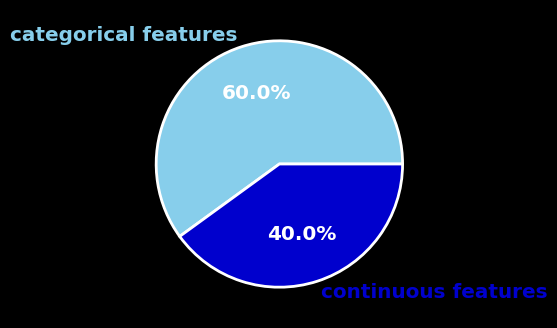

In [ ]:
# piechart showing the distribution
fig, ax= plt.subplots(figsize= (6, 4), facecolor= 'black')
wedges, texts, pcts =ax.pie([len(categorical_columns), len(continuous_columns)],
                             labels= ['categorical features', 'continuous features'],
                             autopct= '%.1f%%',
                             colors= ['skyblue', 'mediumblue'],
                             textprops= {'size': 'x-large'},
                             wedgeprops= {'linewidth': 2, 'edgecolor': 'white'}
                            )

# styling the percent values
plt.setp(pcts, fontweight= 'bold', color= 'white')
plt.setp(texts, fontweight= 600)

# for each wedge, styling the corresponding text label color---> to the wedge's face color
for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())

plt.show()


### Target variable

In [ ]:
target_unique= data['Exited'].value_counts()
target_unique

Exited
0    7963
1    2037
Name: count, dtype: int64

### Insights:
Binary values:
- 1 if the customer closed account with bank
- 0 if the customer is retained

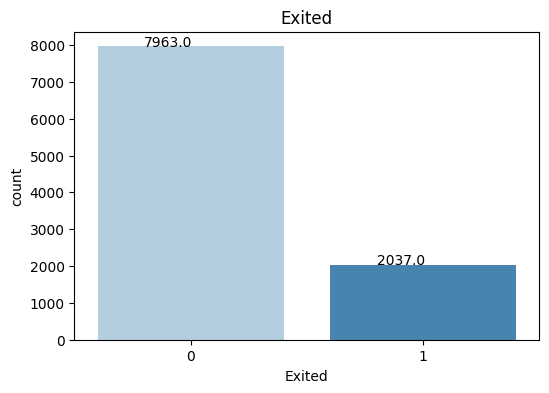

In [ ]:
# visualizing each class of the target variable and their proportions

plt.figure(figsize=(6,4))
ax=sns.countplot(data= data, x= "Exited", palette= 'Blues')

# iterating over each bar of the countplot created
for i in ax.patches:

    # get_x pulls the text left or right;
    # get_height pushes the text up or down
    ax.text(i.get_x() + 0.2, i.get_height() +0.5,\
            str(round(i.get_height(), 2)), fontsize=10)
plt.title("Exited")
plt.show()

Text(0.5, 1.0, '"EXITED"')

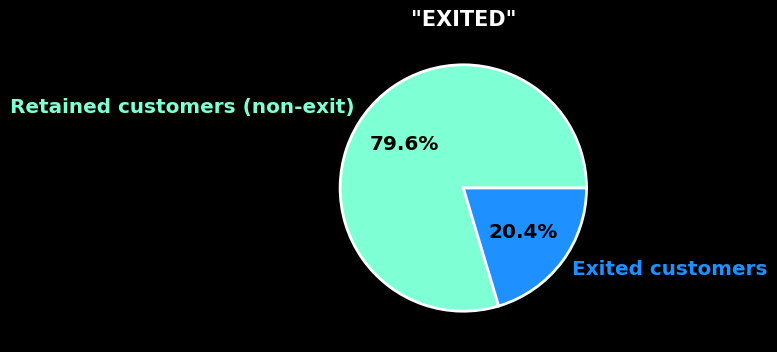

In [ ]:
# defining labels and colors
labels= [f'{"Retained customers (non-exit)" if i==0 else "Exited customers"}'
         for i in range(len(target_unique))]
colors= ['aquamarine', 'dodgerblue']

# creating piechart by plotting the percentage values of each classes
fig, ax= plt.subplots(figsize= (6, 4), facecolor= 'black')

# three return values from pie.---> The wedge patches, the label texts, the percentage texts
# to style them
wedges, texts, pcts= ax.pie(
                             target_unique.values, labels= labels, autopct= '%.1f%%',
                             colors= colors,
                             wedgeprops= {'linewidth': 2, 'edgecolor': 'white'},
                             textprops= {'size': 'x-large'}
                             )

# styling the percent values
plt.setp(pcts, fontweight= 'bold')
plt.setp(texts, fontweight= 600)

# for each wedge, styling the corresponding text label color---> to the wedge's face color
for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())

plt.title('"EXITED"', color= 'white', fontweight= 'bold', fontsize= 15)

In [ ]:
### Insights:
# data is imbalanced with retained customers category being over-represented.

### Categorical features:

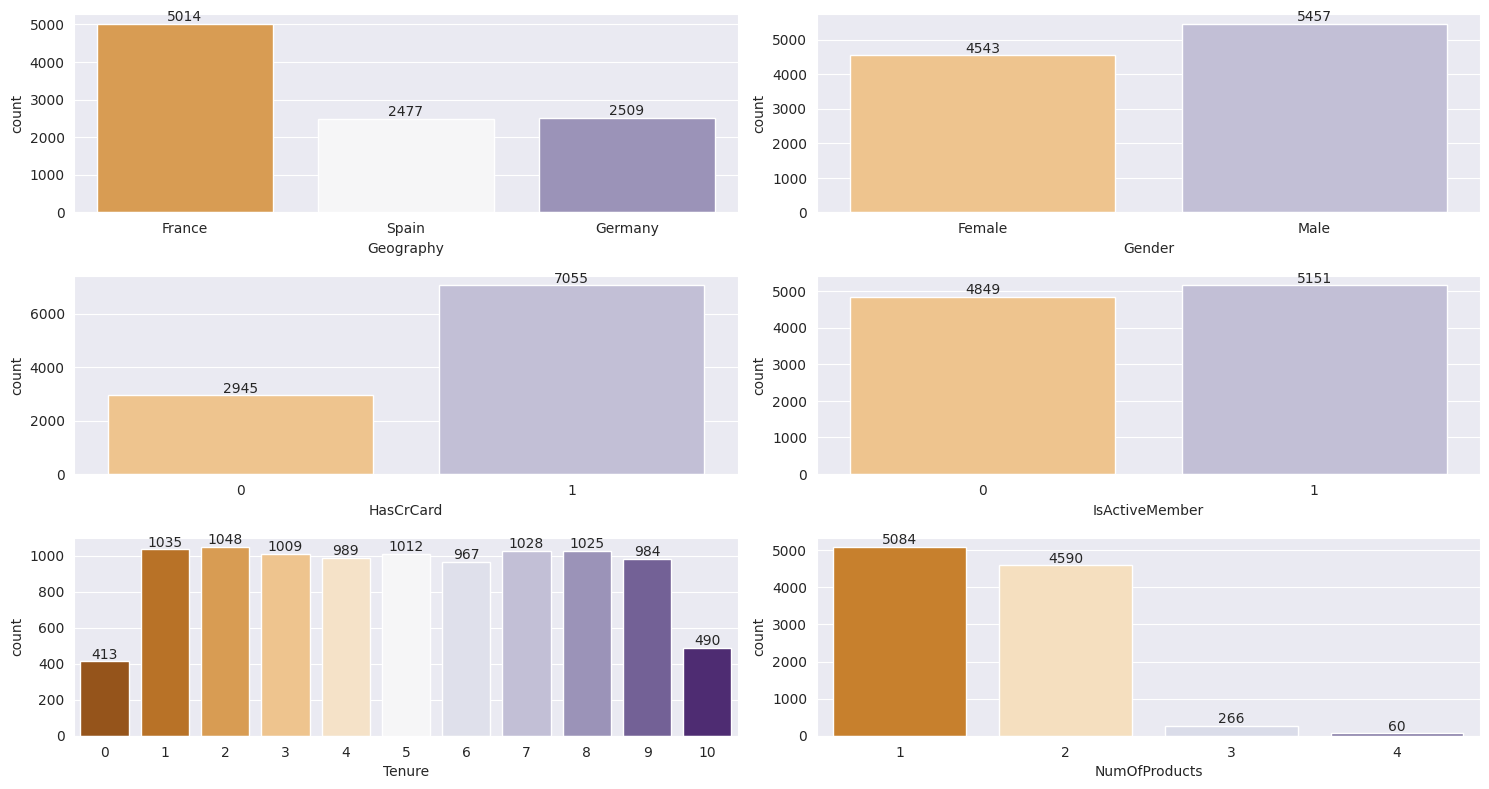

In [ ]:
plt.figure(figsize= (15, 8))
sns.set_style('darkgrid')
plotnumber=1

for column in categorical_columns:
  if plotnumber<=6:
      ax= plt.subplot(3, 2, plotnumber)
      sns.countplot(data= data, x= column, palette= 'PuOr')
      for container in ax.containers:
           ax.bar_label(container, fontsize= 10)
  plotnumber+=1
plt.tight_layout()
plt.show()

### Insights:
- In Geography, France dominates the column.
- Male customers are more than the female.
- Customers who have the credit card constitute the majority.
- Tenure of 2 years has more count followed by 1 year. The least is less than 1 year.
- Most of the customers have the no of products of 1 followed by 2.

### Continuous features:

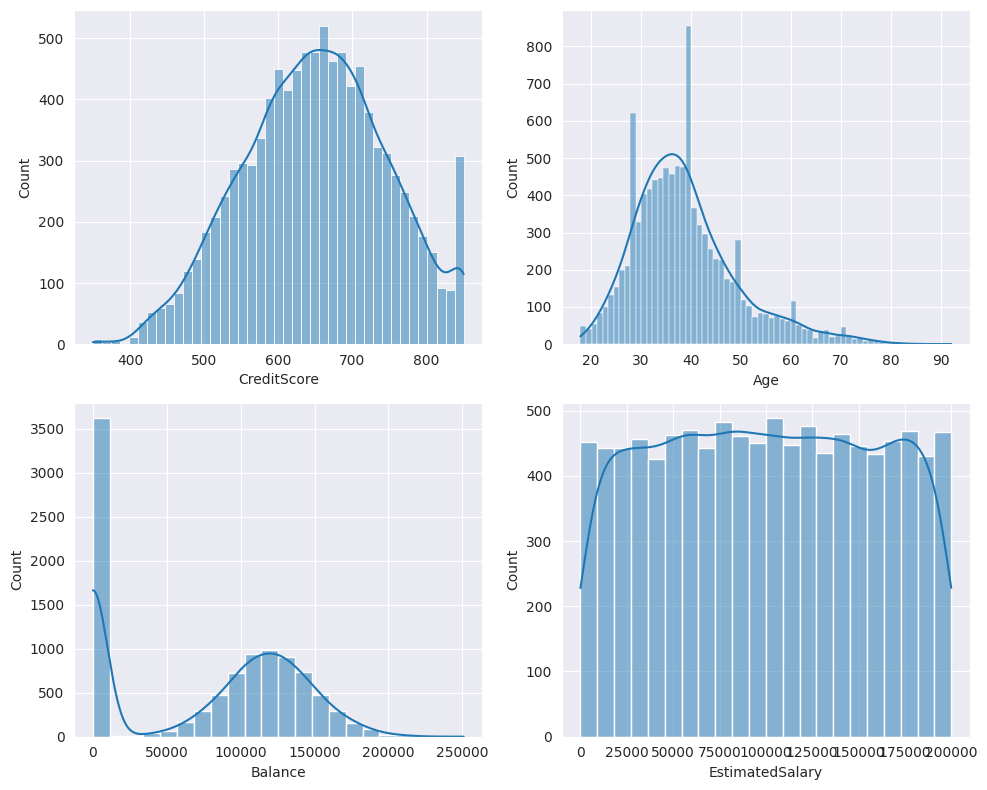

In [ ]:
plt.figure(figsize= (10, 8))
sns.set_style('darkgrid')
plotnumber=1

for column in continuous_columns:
  if plotnumber<=4:
      ax= plt.subplot(2, 2, plotnumber)
      sns.histplot(data= data, x= column, palette= 'winter', kde= True)

  plotnumber+=1
plt.tight_layout()
plt.show()

### Insights:
- CreditScore have roughly normal distribution but has some outliers.
- Age column has postively skewed distribution.
- Balance is normally distributed.
- Estimated Salary shows almost uniform distribution.

### *Bivariate analysis*

### Categorical features<--> target

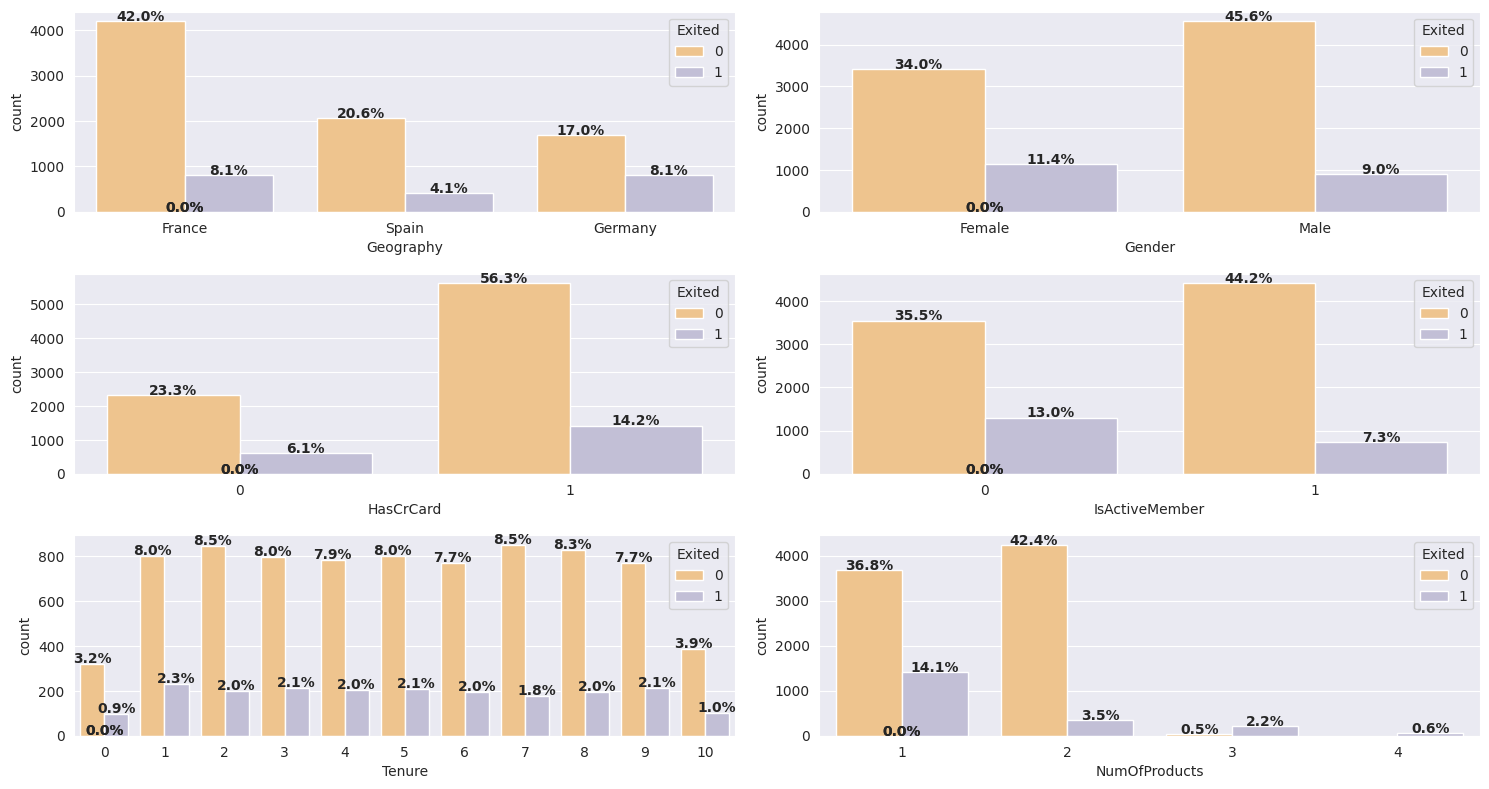

In [ ]:
plt.figure(figsize= (15, 8))
sns.set_style('darkgrid')
plotnumber=1

for column in categorical_columns:
  if plotnumber<=6:
      ax= plt.subplot(3, 2, plotnumber)
      sns.countplot(data= data, x= column, palette= 'PuOr', hue= 'Exited')
      total = float(len(data))

        # iterates through each patch (bar)
      for p in ax.patches:


          # get_height()--> height of the current bar
          height = p.get_height()
          # positions the text at the center of each bar
          ax.text(p.get_x() + p.get_width() / 2, height + 5,
                    f'{height / total * 100:.1f}%', ha="center", fontsize=10, fontweight= 'bold')
      plotnumber+=1
plt.tight_layout()
plt.show()

### Insights:
- People from France have been the majority customers retention rate almost 42% of total customers.
- Male customers have more retention rate compared to female customers.
- Most of the credit card users likely to maintain their accounts with the bank.

### Continuous features <---> target

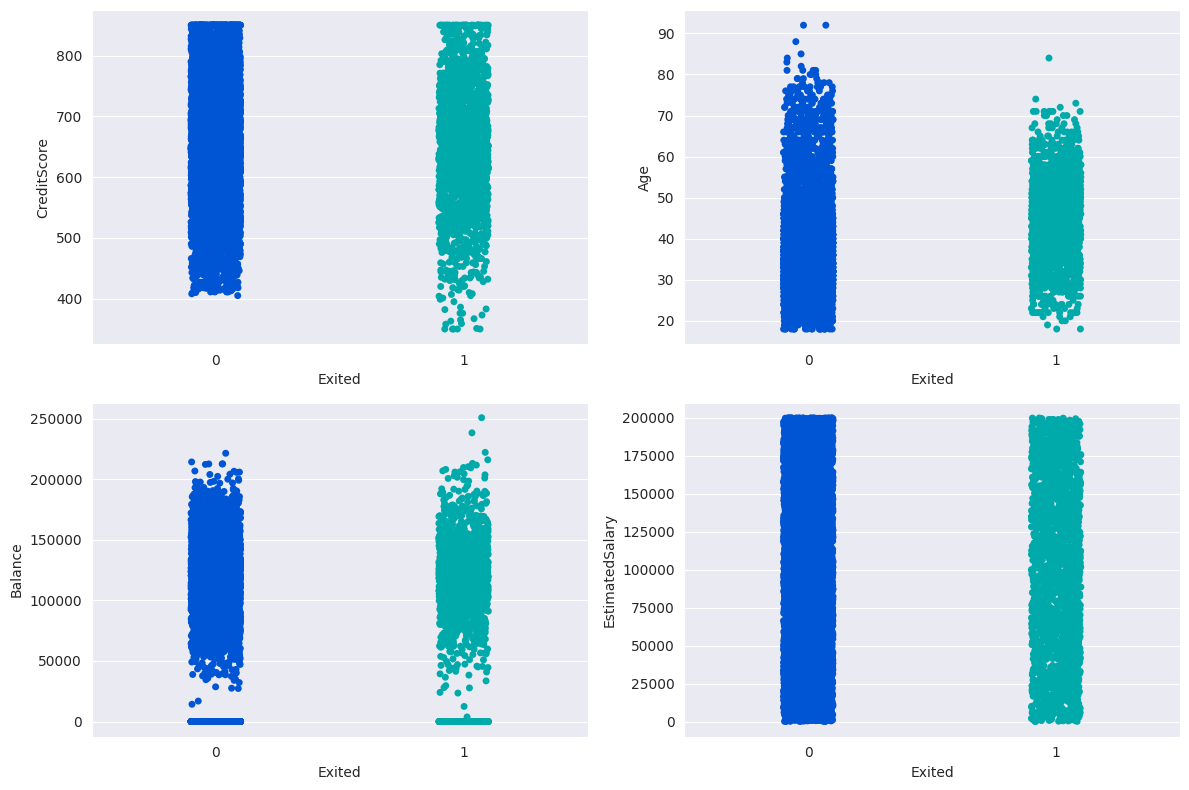

In [ ]:
plt.figure(figsize= (12, 8))
sns.set_style('darkgrid')
plotnumber=1

for column in continuous_columns:
  if plotnumber<=4:
      ax= plt.subplot(2, 2, plotnumber)
      sns.stripplot(data= data, x= target, y= column, palette= 'winter')

  plotnumber+=1
plt.tight_layout()
plt.show()

### *Multivariate analysis*

<Axes: xlabel='Age', ylabel='CreditScore'>

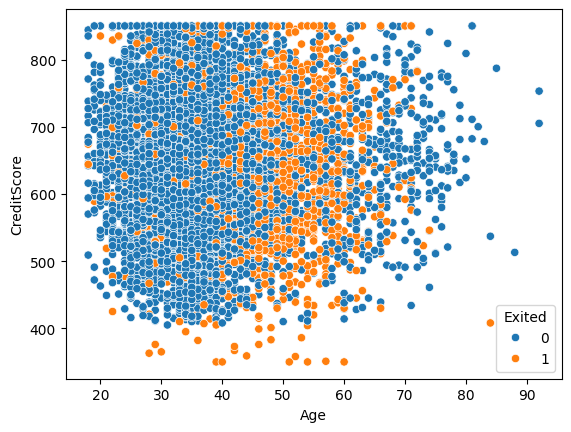

In [ ]:
sns.scatterplot(data= data, x= data.Age, y= data.CreditScore, hue= data['Exited'])

<Axes: xlabel='Age', ylabel='Balance'>

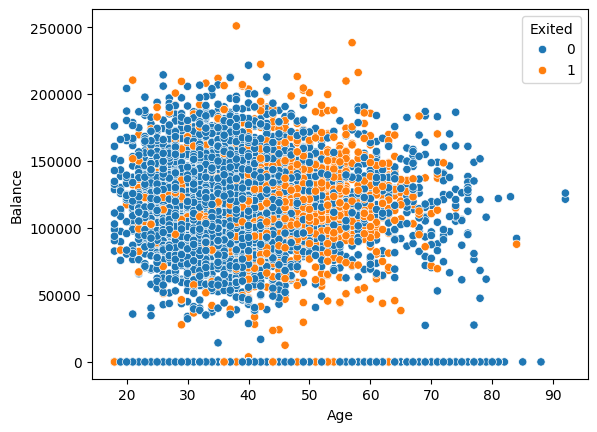

In [ ]:
sns.scatterplot(data= data, x= data.Age, y= data.Balance, hue= data['Exited'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

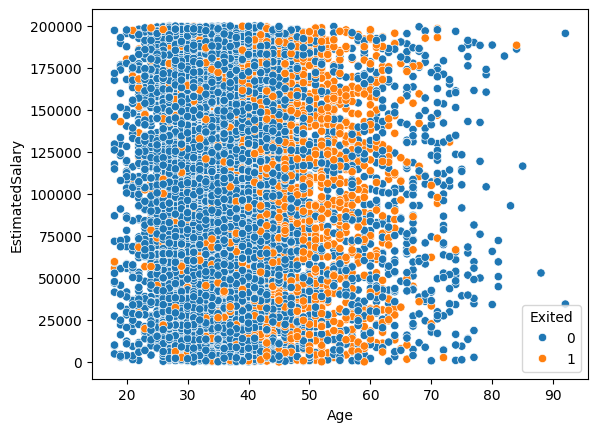

In [ ]:
sns.scatterplot(data= data, x= data.Age, y= data.EstimatedSalary, hue= data['Exited'])

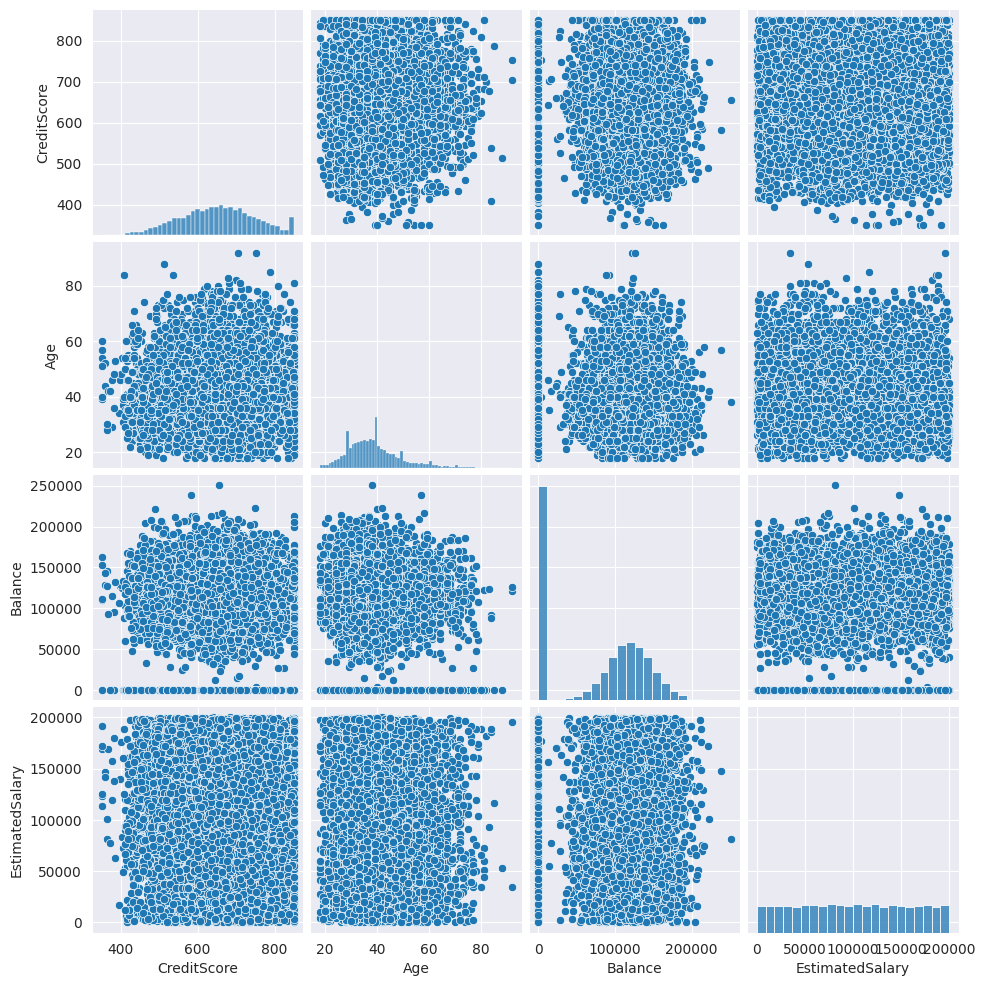

In [ ]:
sns.pairplot(data= data.loc[:, continuous_columns], palette= 'winter')
plt.show()

### DATA PREPROCESSING

### *Check for null values*

In [ ]:
# checking null values:

data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### *check for duplicate records*

In [ ]:
# checking duplicated records

data.duplicated().sum()

0

### *Encoding*

In [ ]:
# Geography

data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
# Gender
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
Geography= pd.get_dummies(data["Geography"], drop_first= True)
Gender= pd.get_dummies(data["Gender"], drop_first= True)

In [ ]:
Geography.head(2)

,Germany,Spain
0,False,False
1,False,True


In [ ]:
Gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [ ]:
data= pd.concat([data, Geography, Gender], axis= 1)

In [ ]:
data.drop(["Geography", "Gender"], axis=1, inplace=True) # deleting the original unencoded columns

In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


### *Outliers handling*


In [ ]:
continuous_columns

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

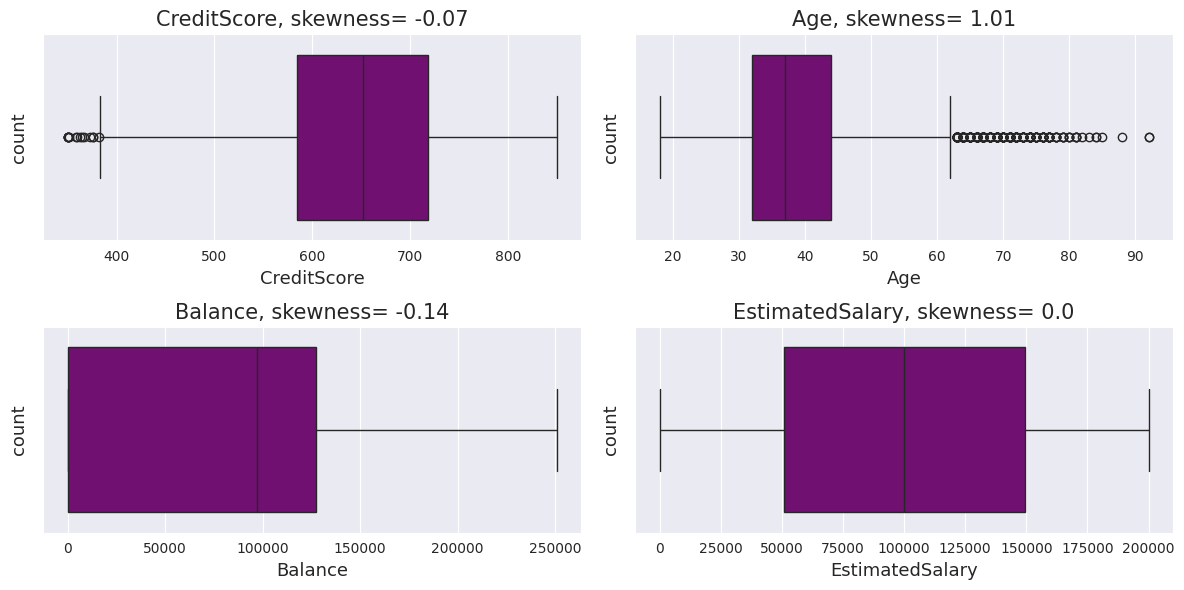

In [ ]:
# visualizing the continuous columns through boxplot to check the presence of outliers

plt.figure(figsize= (12, 6))
sns.set_style('darkgrid')
plotnumber=1

for column in continuous_columns:
  if plotnumber <=4:
    ax= plt.subplot(2, 2, plotnumber)
    sns.boxplot(data= data, x=column, color= 'purple', orient='h')
    ax.set_title(f'{column}, skewness= {round(data[column].skew(),2)}', fontsize= 15)
    plt.xlabel(column, fontsize= 13)
    plt.ylabel('count', fontsize= 13)
  plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
# Detecting outliers
# by IQR method

num_columns= data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
q1= num_columns.quantile(0.25)
q3= num_columns.quantile(0.75)
iqr= q3 - q1

lower_limit= q1 - 1.5*iqr
upper_limit= q3 + 1.5*iqr

# Identifying outliers
outliers= ((num_columns < lower_limit)|(num_columns > upper_limit))

# total number of outliers for each variable
total_count_outliers= outliers.sum()

total_count_outliers.to_frame().T.style.background_gradient(cmap= 'Purples')

,CreditScore,Age,Balance,EstimatedSalary
0,15,359,0,0


In [ ]:
# CreditScore

q1= data.CreditScore.quantile(0.25)
q3= data.CreditScore.quantile(0.75)
iqr= q3 - q1
lower_lim= q1 - 1.5*iqr
upper_lim= q3 + 1.5*iqr
print('lower limit is ', lower_lim)
print('Upper limit is ', upper_lim)

lower limit is  383.0
Upper limit is  919.0


In [ ]:
len(data.loc[(data['CreditScore'] < lower_lim)|(data['CreditScore'] > upper_lim)]) / len(data)

0.0015

In [ ]:
data.loc[data['CreditScore'] < lower_lim, 'CreditScore']

7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

In [ ]:
data.loc[data.CreditScore > upper_lim]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male


In [ ]:
data.loc[data['CreditScore'] < lower_lim, 'CreditScore'] = np.median(data['CreditScore'])

In [ ]:
data.loc[data['CreditScore'] < lower_lim]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male


In [ ]:
# Age

q1= data.Age.quantile(0.25)
q3= data.Age.quantile(0.75)
iqr= q3 - q1
lower_lim= q1 - 1.5*iqr
upper_lim= q3 + 1.5*iqr
print('lower limit is ', lower_lim)
print('Upper limit is ', upper_lim)

lower limit is  14.0
Upper limit is  62.0


In [ ]:
len(data.loc[(data['Age'] < lower_lim)|(data['Age'] > upper_lim)]) / len(data)

0.0359

In [ ]:
data.loc[data['Age'] < lower_lim, 'Age']

Series([], Name: Age, dtype: int64)

In [ ]:
data.loc[data['Age'] > upper_lim, 'Age']

58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: Age, Length: 359, dtype: int64

In [ ]:
data.loc[data['Age'] > upper_lim, 'Age']= np.median(data['Age'])


In [ ]:
data.loc[data['Age'] > upper_lim, 'Age']

Series([], Name: Age, dtype: int64)

### *Scaling*

In [ ]:
# splitting data into X and y
X= data.drop('Exited', axis=1)

In [ ]:
y= data.Exited

In [ ]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 20)

# default test size is 0.25

In [ ]:
print(f'X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\
\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

X_train shape: (7500, 11)
X_test shape: (2500, 11)
y_train shape: (7500,)
y_test shape: (2500,)


In [ ]:
# feature scaling---> utmost important in deep neural networks
# In any distance based algorithms, scaling is important so that the datapoints
# will be brought within a certain range and prevents the model from being biased
# towards a certain feature with high magnitude and less important( less contribution in the prediction).

# Thus scaling gives equal importance to all features irrespective of its magnitude.
# Since in Deep learning neural network, it works like a linear regression which
# performs well for linearly placed data (easy to fit a line), scaling is important
# for deep neural networks.

# fit---> learn from data (learn the parameters like mean and std from the data)
# fit_transform-->Both learning and then it applies the transformation to scale the features

# we apply only "transform" on "X_test"---> because already "fit" is applied to X_train
# scaling parameters are being learnt from training data,
# Re-learning form test data would introduce data leakage and incorrect model evaluation.

# data leakage?
# info from the test set is seen by the model and hence it will perform well on
# test set but fails to perform on unseeen data which defeats the purpose of model evaluation

# Hence to ensure fair evaluation and generalization to new data, we keep the
# test data unseen during training, including the scaling process!

# In some previous ml models, scaling is done without splitting into train and test set
# But the following is the better practice to have a generalized model.

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

### *Balancing the dataset*

In [ ]:
y_train.value_counts()

Exited
0    5941
1    1559
Name: count, dtype: int64

In [ ]:
# importing SMOTE function

from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)

In [ ]:
# Checking the labels of the target variable

from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({0: 5941, 1: 1559})
Counter({0: 5941, 1: 5941})


### FEATURE ENGINEERING

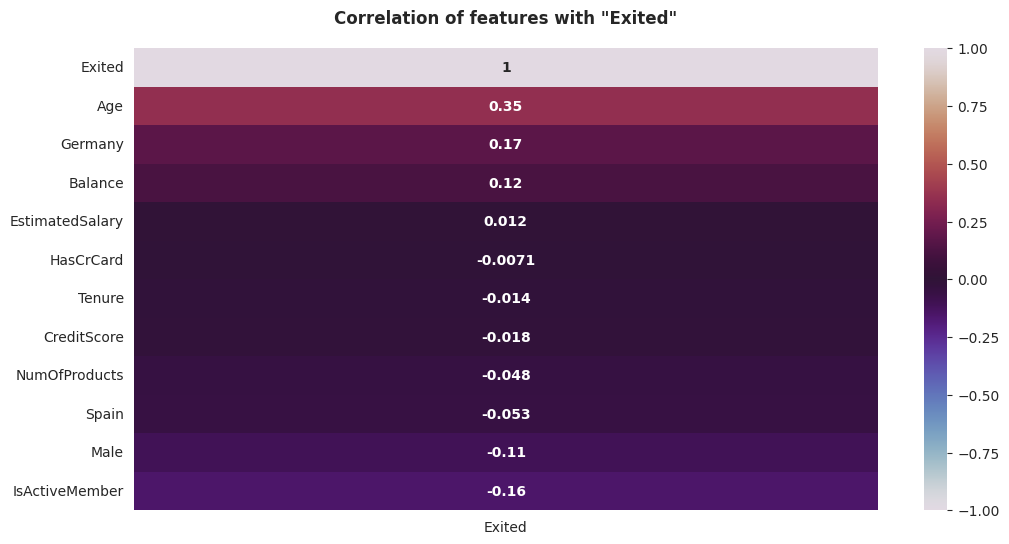

In [ ]:
plt.figure(figsize= (12, 6), dpi= 100)
heatmap= sns.heatmap(data.corr()[['Exited']].sort_values(by= 'Exited', ascending= False),
                     vmin= -1, vmax = 1, annot= True, cmap= 'twilight')

# Looping through the text elements and setting the font weight to bold
for text in heatmap.texts:
    text.set_fontweight('bold')

heatmap.set_title('Correlation of features with "Exited"', fontsize= 12, pad= 18, fontweight= 'bold')
plt.show()

### MODEL BUILDING:

In [ ]:
# Tensorflow-- framework too much complicated to use
# google colaboratory-- >ide designed by google with pre-installed libraries like tensorflow.
# In local system, different configuration needs to be done to use tensorflow.

# keras is later created which is a wrapper around Theanos (complex library in early days)
# Then keras is used on top of Tensorflow as a wrapper
# Google hired scientist who invented keras
# hence both tensorflow and keras come under google

# so both of the below lines of code are correct:
# from tensorflow import keras   (or)
# from keras import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
# Sequential --> we are adding layers sequentially (layers are added consecutively)
# In a complex neural network, we use "Functional" model

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Dense-->denotes the layer with neurons
# Droput layer--> switch off (deactive some of the neurons) to prevent overfitting
# eg: droput(0.3)--> 30% of neurons are deactivated.

In [ ]:
# Defining the model
model= Sequential()

In [ ]:
# Adding input layer to the first hidden layer
model.add(Dense(units=11, input_dim= 11, activation= 'relu',
                kernel_initializer= 'he_uniform'))
# units- no of neurons, input_dimension- no of inputs added from the previous layer
#  kernel_initializer- weight initialization, for Relu Af---> use He normal or uniform

# Adding first hidden layer to second hidden layer
model.add(Dense(units=16, activation= 'relu', kernel_initializer= 'he_uniform'))

# Adding second hidden layer to third hidden layer
model.add(Dense(units= 8, activation= 'relu', kernel_initializer= 'he_uniform'))

#Adding third hidden layer to output layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer= 'glorot_uniform'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 16)                192       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 469 (1.83 KB)
Trainable params: 469 (1.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# In summary,
# param= 132---> initially 11 features sent to first hidden layer of 11 neurons hence
# parameters in the 1st layer is 11*11= 121 + 11 bisaseshence total is 132 parameters.

In [ ]:
# compile the keras model
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

# give loss function, optimizer to be used and evaluation metric

In [ ]:
# fit the keras model on the dataset
model_history= model.fit(X_train, y_train, epochs=15, validation_split= 0.33, batch_size= 10)

# epoch- when one complete data is trained (beware of giving too much of epochs which
# may have risk of overfitting)

# validation set is also like a testing set but validation datset is used to evaluate the 
# model during training itself.  Testing data is used only in testing phase.

# validation_split- some data from training data which is used to validate the
# model at every epoch (various pros and cons are there)

# batch_size- no of data points sent at a time to the network to train
# hence example: if there are 10 records and the batch size is 2, then
# total iteration= 10/ 2= 5 iterations.

# in this dataset 7500 is total datapoints, validation= 33% SO
# 7500- (7500*0.33)=5025 datapoints
# batch size is 10 therefore no of iterations= 5025/10= 502.5
# Hence 1 epoch = 503  iterations (or) 503 batches sent for one epoch.

# batch size should be considered based on the time complexity and the space complexity
# of the system.

Epoch 1/15
503/503 [==============================] - 3s 3ms/step - loss: 0.5254 - accuracy: 0.7811 - val_loss: 0.4629 - val_accuracy: 0.8009
Epoch 2/15
503/503 [==============================] - 1s 3ms/step - loss: 0.4604 - accuracy: 0.7916 - val_loss: 0.4162 - val_accuracy: 0.8110
Epoch 3/15
503/503 [==============================] - 2s 3ms/step - loss: 0.4365 - accuracy: 0.7990 - val_loss: 0.4042 - val_accuracy: 0.8174
Epoch 4/15
503/503 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.8045 - val_loss: 0.3958 - val_accuracy: 0.8223
Epoch 5/15
503/503 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8109 - val_loss: 0.3840 - val_accuracy: 0.8284
Epoch 6/15
503/503 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8161 - val_loss: 0.3743 - val_accuracy: 0.8380
Epoch 7/15
503/503 [==============================] - 2s 3ms/step - loss: 0.3975 - accuracy: 0.8250 - val_loss: 0.3628 - val_accuracy: 0.8449
Epoch 

In [ ]:
accuracy= model.evaluate(X_test, y_test)
accuracy

79/79 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8600


[0.33863869309425354, 0.8600000143051147]

In [ ]:
# list all data in history
print(model_history.history.keys())
# loss, accuracy---> training metrics
# val_loss, val_accuracy---> testing metrics

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


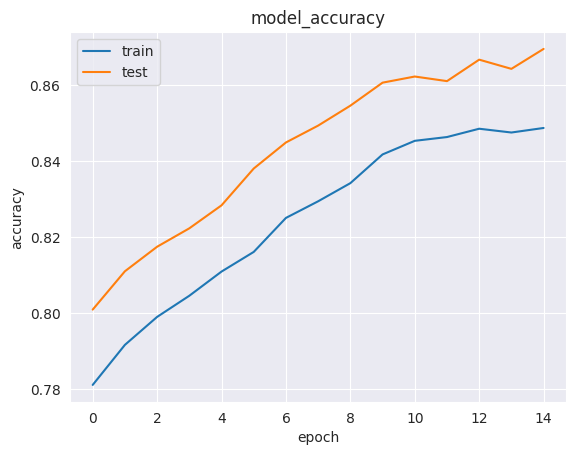

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

# we can check the overfit region as training acuracy dominates the testing accuracy
# better stop epoch at the point where the two curves go apart from each other
# Can retrain the whole model with the no of epochs inferred from the graph.

# so basically retrain the model based on the analysis from the graph

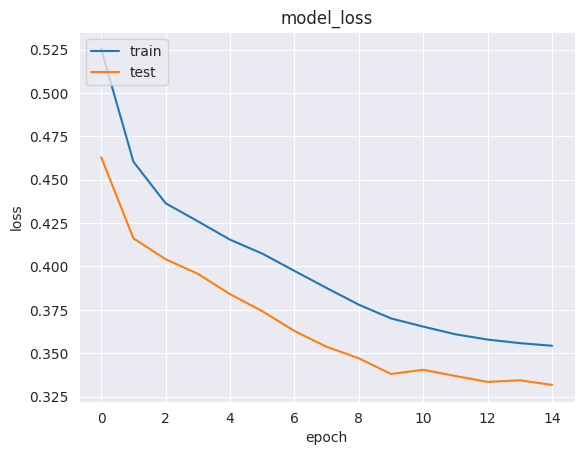

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

# similar analysis for loss also

### MODEL EVALUATION

In [ ]:
# making the predictions and evaluating the model

# Predicting the test results
y_pred= model.predict(X_test)
y_pred= (y_pred> 0.5)

79/79 [==============================] - 0s 1ms/step


In [ ]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1924,   98],
       [ 252,  226]])

In [ ]:
# Calculate the accuracy
score= accuracy_score(y_test, y_pred)
score

0.86

In [ ]:
# for the type of losses that can be used from keras library,
# can refer its documentation by simply googling it.